In [128]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Finding Data

In [129]:
from pandas import ExcelFile
from pandas import ExcelWriter

df_expanded = pd.read_excel("/Users/dostow/documents/Python/EmployeeAttritionData.xlsx")
print df_expanded.head()
print df_expanded.size

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

## Cleaning Data

In [130]:
df_expanded.BusinessTravel.unique()

array([u'Travel_Rarely', u'Travel_Frequently', u'Non-Travel'], dtype=object)

In [131]:
travel_dummies = pd.get_dummies(df_expanded.BusinessTravel).astype(int)
travel_dummies.head()

,Non-Travel,Travel_Frequently,Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [132]:
df_expanded = pd.concat([df_expanded, travel_dummies], axis = 1)
df_expanded.drop("BusinessTravel", inplace = True, axis =1)
df_expanded.head()


,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely
0,41,Yes,1102,Sales,1,2,Life Sciences,1,1,2,...,8,0,1,6,4,0,5,0,0,1
1,49,No,279,Research & Development,8,1,Life Sciences,1,2,3,...,10,3,3,10,7,1,7,0,1,0
2,37,Yes,1373,Research & Development,2,2,Other,1,4,4,...,7,3,3,0,0,0,0,0,0,1
3,33,No,1392,Research & Development,3,4,Life Sciences,1,5,4,...,8,3,3,8,7,3,0,0,1,0
4,27,No,591,Research & Development,2,1,Medical,1,7,1,...,6,3,3,2,2,2,2,0,0,1


In [133]:
dept_dummies = pd.get_dummies(df_expanded.Department).astype(int)
dept_dummies.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [134]:
df_expanded = pd.concat([df_expanded, dept_dummies], axis = 1)
df_expanded.drop("Department", inplace= True, axis=1)
df_expanded.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,41,Yes,1102,1,2,Life Sciences,1,1,2,Female,...,6,4,0,5,0,0,1,0,0,1
1,49,No,279,8,1,Life Sciences,1,2,3,Male,...,10,7,1,7,0,1,0,0,1,0
2,37,Yes,1373,2,2,Other,1,4,4,Male,...,0,0,0,0,0,0,1,0,1,0
3,33,No,1392,3,4,Life Sciences,1,5,4,Female,...,8,7,3,0,0,1,0,0,1,0
4,27,No,591,2,1,Medical,1,7,1,Male,...,2,2,2,2,0,0,1,0,1,0


In [135]:
df_expanded.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.311309,0.212901,0.216513,0.202089,-0.011215,-0.024743,0.028791,0.020523,0.017883,-0.027549
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.034055,0.009932,-0.033229,-0.026363,0.012096,-0.011776,0.002078,-0.026726,0.014871,-0.003616
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.009508,0.018845,0.010029,0.014406,0.023605,0.005081,-0.020116,-0.012901,-0.008117,0.014085
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.069114,0.060236,0.054254,0.069065,0.004524,-0.008292,0.004126,0.011435,-0.018604,0.014215
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.011240,-0.008416,-0.009019,-0.009197,0.022272,-0.007980,-0.007976,0.063431,-0.041923,0.015441
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.001458,0.018007,0.016194,-0.004999,0.003568,-0.012624,0.008496,-0.007597,0.027976,-0.025606
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.019582,-0.024106,-0.026716,-0.020123,-0.016994,-0.018819,0.027541,-0.016551,0.018686,-0.012047
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.021355,0.008717,-0.024184,0.025976,-0.045779,0.004424,0.026714,0.004789,0.023187,-0.026107
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.534739,0.389447,0.353885,0.375281,-0.007295,-0.021557,0.023433,-0.006157,-0.107830,0.114307


In [136]:
df_expandedield_dummies = pd.get_dummies(df_expanded.EducationField).astype(int)
df_expandedield_dummies = df_expandedield_dummies.rename(columns= {"Human Resources": "ed_HumanResources", "Life Sciences": "ed_LifeScience", "Marketing": "ed_Marketing", "Medical": "ed_Medical", "Other": "ed_Other", "Technical Degree": "ed_TechnicalDegree"})
df_expanded = pd.concat([df_expanded, df_expandedield_dummies], axis = 1)
df_expanded.drop("EducationField", inplace=True, axis=1)
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Travel_Rarely,Human Resources,Research & Development,Sales,ed_HumanResources,ed_LifeScience,ed_Marketing,ed_Medical,ed_Other,ed_TechnicalDegree
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,0,0,1,0,1,0,0,0,0
1,49,No,279,8,1,1,2,3,Male,61,...,0,0,1,0,0,1,0,0,0,0
2,37,Yes,1373,2,2,1,4,4,Male,92,...,1,0,1,0,0,0,0,0,1,0
3,33,No,1392,3,4,1,5,4,Female,56,...,0,0,1,0,0,1,0,0,0,0
4,27,No,591,2,1,1,7,1,Male,40,...,1,0,1,0,0,0,0,1,0,0


In [137]:
married_dummies = pd.get_dummies(df_expanded.MaritalStatus).astype(int)
df_expanded = pd.concat([df_expanded, married_dummies], axis = 1)
df_expanded.drop("MaritalStatus", inplace = True, axis = 1)
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Sales,ed_HumanResources,ed_LifeScience,ed_Marketing,ed_Medical,ed_Other,ed_TechnicalDegree,Divorced,Married,Single
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,0,1,0,0,0,0,0,0,1
1,49,No,279,8,1,1,2,3,Male,61,...,0,0,1,0,0,0,0,0,1,0
2,37,Yes,1373,2,2,1,4,4,Male,92,...,0,0,0,0,0,1,0,0,0,1
3,33,No,1392,3,4,1,5,4,Female,56,...,0,0,1,0,0,0,0,0,1,0
4,27,No,591,2,1,1,7,1,Male,40,...,0,0,0,0,1,0,0,0,1,0


In [138]:
gender_Yes_key = {"Male": 0, "Female": 1, "Yes": 1, "No": 0, "y": 1}
df_expanded = df_expanded.applymap(lambda s: gender_Yes_key.get(s) if s in gender_Yes_key else s)
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Sales,ed_HumanResources,ed_LifeScience,ed_Marketing,ed_Medical,ed_Other,ed_TechnicalDegree,Divorced,Married,Single
0,41,1,1102,1,2,1,1,2,1,94,...,1,0,1,0,0,0,0,0,0,1
1,49,0,279,8,1,1,2,3,0,61,...,0,0,1,0,0,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,0,92,...,0,0,0,0,0,1,0,0,0,1
3,33,0,1392,3,4,1,5,4,1,56,...,0,0,1,0,0,0,0,0,1,0
4,27,0,591,2,1,1,7,1,0,40,...,0,0,0,0,1,0,0,0,1,0


In [139]:
job_dummies = pd.get_dummies(df_expanded.JobRole).astype(int)
df_expanded = pd.concat([df_expanded, job_dummies], axis=1)
df_expanded.drop("JobRole", inplace=True, axis = 1)
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,1,2,1,94,...,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,0,61,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,0,92,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,1,56,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,0,40,...,0,0,0,1,0,0,0,0,0,0


## Understanding Data

In [140]:
df_expanded.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,65.891156,...,0.319728,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,0.466530,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df_expanded.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.036311,0.024287,...,-0.119185,0.098825,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.029453,-0.006846,...,0.175419,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.011716,0.023381,...,-0.075835,0.040141,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.001851,0.031131,...,-0.027445,0.022916,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016547,0.016775,...,0.004168,0.024270,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,-0.022556,0.035179,...,-0.035189,0.025945,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.000508,-0.049857,...,0.009035,0.014090,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949
Gender,0.036311,-0.029453,0.011716,0.001851,0.016547,NaN,-0.022556,-0.000508,1.000000,0.000478,...,0.032752,-0.006823,-0.036082,-0.067793,0.033880,0.065197,0.006121,-0.009745,0.005348,0.028877
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,0.000478,1.000000,...,-0.033436,0.014599,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703


In [142]:
df_expanded = df_expanded.drop(["StandardHours", "EmployeeCount", "Over18"], axis = 1)

In [143]:
df_expanded["Gender"].count()

1470

In [144]:
df_expanded.Gender.value_counts()

0    882
1    588
Name: Gender, dtype: int64

<function matplotlib.pyplot.show>

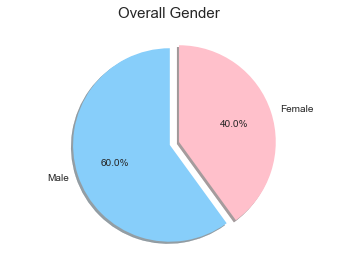

In [145]:

Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0,.1]
fig = plt.figure()
plt.pie(df_expanded.Gender.value_counts(),explode = explode, labels = Labels, colors = Colors, autopct='%1.1f%%', shadow = True, startangle = 90)
fig.suptitle("Overall Gender", fontsize =15)
plt.axis('equal')
plt.show

In [146]:
df_expanded.groupby("JobLevel").Gender.mean()

JobLevel
1    0.366483
2    0.411985
3    0.431193
4    0.481132
5    0.347826
Name: Gender, dtype: float64

In [147]:
df_expanded.PerformanceRating.unique()

array([3, 4])

In [148]:
seniority_groups = df_expanded.groupby("JobLevel")
seniority_groups.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,2,1,94,3,...,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,2,3,0,61,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,4,0,92,2,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,5,4,1,56,3,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,7,1,0,40,3,...,0,0,0,1,0,0,0,0,0,0
5,32,0,1005,2,2,8,4,0,79,3,...,1,0,0,1,0,0,0,0,0,0
6,59,0,1324,3,3,10,3,1,81,4,...,0,0,0,1,0,0,0,0,0,0
8,38,0,216,23,3,12,4,0,44,2,...,1,0,0,0,0,1,0,0,0,0
9,36,0,1299,27,3,13,3,0,94,3,...,0,1,0,0,0,0,0,0,0,0
11,29,0,153,15,2,15,4,1,49,2,...,1,0,0,1,0,0,0,0,0,0


In [149]:
df_expanded.iloc[5]

Age                             32
Attrition                        0
DailyRate                     1005
DistanceFromHome                 2
Education                        2
EmployeeNumber                   8
EnvironmentSatisfaction          4
Gender                           0
HourlyRate                      79
JobInvolvement                   3
JobLevel                         1
JobSatisfaction                  4
MonthlyIncome                 3068
MonthlyRate                  11864
NumCompaniesWorked               0
OverTime                         0
PercentSalaryHike               13
PerformanceRating                3
RelationshipSatisfaction         3
StockOptionLevel                 0
TotalWorkingYears                8
TrainingTimesLastYear            2
WorkLifeBalance                  2
YearsAtCompany                   7
YearsInCurrentRole               7
YearsSinceLastPromotion          3
YearsWithCurrManager             6
Non-Travel                       0
Travel_Frequently   

In [150]:
seniority_groups.JobLevel.size()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [151]:
Manager = df_expanded[df_expanded["JobLevel"] == 5]
Seniority_lower = df_expanded[df_expanded["JobLevel"] <= 3]
Seniority_upper = df_expanded[df_expanded["JobLevel"] >= 4]
mid_manager = df_expanded[df_expanded["JobLevel"] == 4]
mid_manager_female = mid_manager[mid_manager["Gender"] == 1]

In [152]:
Manager.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
25,53,0,1282,5,3,32,3,1,58,3,...,0,0,0,0,1,0,0,0,0,0
29,46,0,705,2,4,38,2,1,83,3,...,1,0,0,0,1,0,0,0,0,0
45,41,1,1360,12,3,58,2,1,49,3,...,0,0,0,0,0,0,1,0,0,0
62,50,0,989,7,2,80,2,1,43,2,...,0,0,0,0,0,0,1,0,0,0
105,59,0,1420,2,4,140,3,1,32,2,...,0,0,0,0,1,0,0,0,0,0


In [153]:
Manager.Gender.value_counts()

0    45
1    24
Name: Gender, dtype: int64

<function matplotlib.pyplot.show>

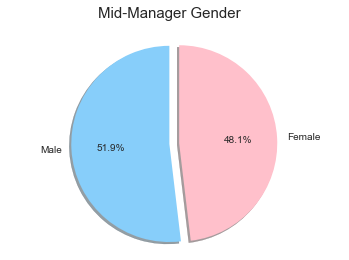

In [154]:
Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0, .1]

fig = plt.figure()
plt.pie(mid_manager.Gender.value_counts(), explode = explode, labels = Labels, colors = Colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
fig.suptitle("Mid-Manager Gender", fontsize = 15)
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

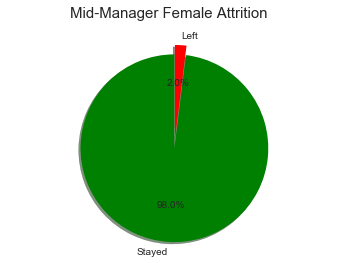

In [155]:
Labels = "Stayed", "Left"
Colors = ["green", "red"]
explode = [0, .1]

fig = plt.figure()
plt.pie(mid_manager_female.Attrition.value_counts(), explode = explode, labels = Labels, colors = Colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
fig.suptitle("Mid-Manager Female Attrition", fontsize = 15)
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

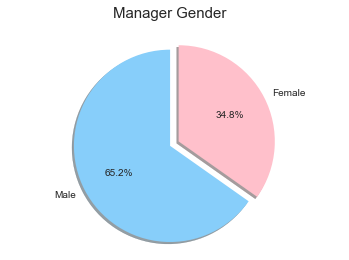

In [156]:
Labels = "Male", "Female"
Colors = ["lightskyblue", "pink"]
explode = [0,.1]

fig = plt.figure()
plt.pie(Manager.Gender.value_counts(),explode = explode, labels = Labels, colors = Colors, autopct='%1.1f%%', shadow = True, startangle = 90)
fig.suptitle("Manager Gender", fontsize =15)
plt.axis('equal')
plt.show

In [157]:
df_expanded.groupby(["JobLevel", "Gender"]).Attrition.value_counts()

JobLevel  Gender  Attrition
1         0       0            254
                  1             90
          1       0            146
                  1             53
2         0       0            280
                  1             34
          1       0            202
                  1             18
3         0       0            104
                  1             20
          1       0             82
                  1             12
4         0       0             51
                  1              4
          1       0             50
                  1              1
5         0       0             43
                  1              2
          1       0             21
                  1              3
Name: Attrition, dtype: int64

In [158]:
df_expanded.groupby("JobLevel").Attrition.value_counts()

JobLevel  Attrition
1         0            400
          1            143
2         0            482
          1             52
3         0            186
          1             32
4         0            101
          1              5
5         0             64
          1              5
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x11942d810>,
  <matplotlib.text.Text at 0x119444a50>])

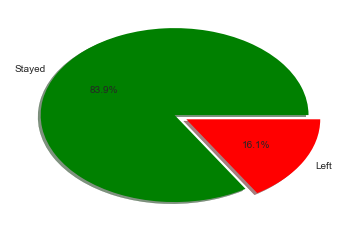

In [159]:
plt.pie(df_expanded.Attrition.value_counts(), autopct='%1.1f%%', explode = [0, .1], labels = ["Stayed", "Left"], colors = ["green", "red"], shadow = True)

([<matplotlib.patches.Wedge at 0x119519a50>,
  <matplotlib.text.Text at 0x119532290>])

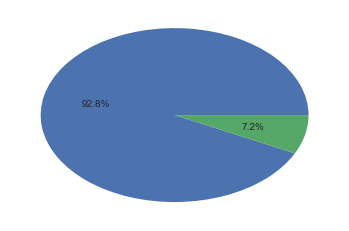

In [160]:
plt.pie(Manager.Attrition.value_counts(), autopct= "%1.1f%%")

([<matplotlib.patches.Wedge at 0x1187cdf50>,
  <matplotlib.text.Text at 0x11435d950>])

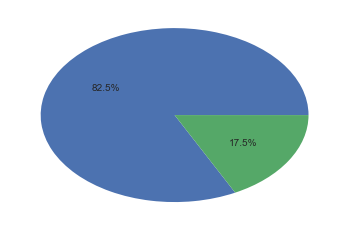

In [161]:
plt.pie(Seniority_lower.Attrition.value_counts(), autopct= "%1.1f%%")

([<matplotlib.patches.Wedge at 0x118840390>,
  <matplotlib.text.Text at 0x11876d2d0>])

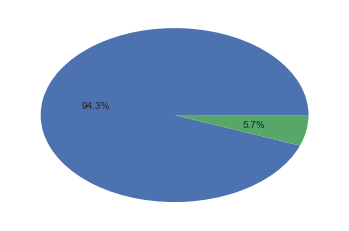

In [162]:
plt.pie(Seniority_upper.Attrition.value_counts(), autopct = "%1.1f%%")

## Decision Trees

In [163]:

#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt


#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

%matplotlib inline

In [164]:
df_expanded.columns.tolist()[1]

u'Attrition'

In [165]:
X, y = df_expanded.drop("Attrition", axis = 1), df_expanded["Attrition"]
feature_names = X.columns.tolist()
target_name = df_expanded.columns.tolist()[1]


In [166]:
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,2,1,94,3,...,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,2,3,0,61,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,4,0,92,2,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,5,4,1,56,3,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,7,1,0,40,3,...,0,0,0,1,0,0,0,0,0,0


In [167]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1102,1,2,1,2,1,94,3,2,...,1,0,0,0,0,0,0,0,1,0
1,49,279,8,1,2,3,0,61,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,4,0,92,2,1,...,1,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,5,4,1,56,3,1,...,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,7,1,0,40,3,1,...,0,0,0,1,0,0,0,0,0,0


In [168]:
df_expanded.columns.tolist()

[u'Age',
 u'Attrition',
 u'DailyRate',
 u'DistanceFromHome',
 u'Education',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobSatisfaction',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager',
 u'Non-Travel',
 u'Travel_Frequently',
 u'Travel_Rarely',
 u'Human Resources',
 u'Research & Development',
 u'Sales',
 'ed_HumanResources',
 'ed_LifeScience',
 'ed_Marketing',
 'ed_Medical',
 'ed_Other',
 'ed_TechnicalDegree',
 u'Divorced',
 u'Married',
 u'Single',
 u'Healthcare Representative',
 u'Human Resources',
 u'Laboratory Technician',
 u'Manager',
 u'Manufacturing Director',
 u'Research Director',
 u'Research Scientist',
 u'Sales Executiv

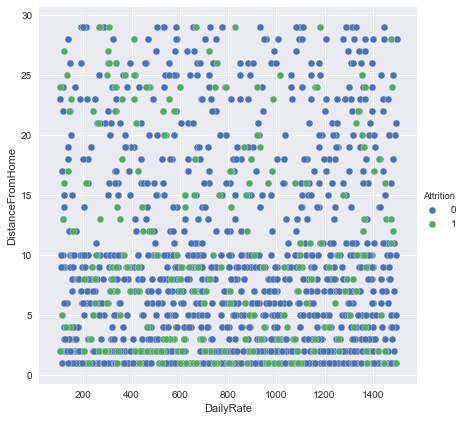

In [169]:
sns.pairplot(df_expanded, x_vars = ["DailyRate"], y_vars=["DistanceFromHome"], hue = 'Attrition', size =6)

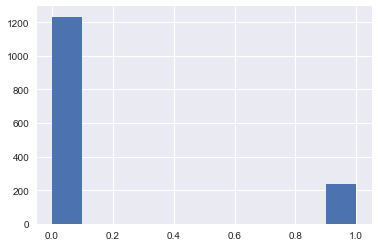

In [170]:
y.hist()

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.4, random_state =20)

In [172]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
910,23,373,1,2,1270,4,0,47,3,1,...,0,0,0,0,0,0,0,1,0,0
728,54,1441,17,3,1013,3,1,56,3,3,...,0,0,0,0,0,1,0,0,0,0
292,31,444,5,3,399,4,1,84,3,1,...,0,0,0,0,0,0,0,0,0,1
1338,30,945,9,3,1876,2,0,89,3,1,...,1,0,0,0,0,0,0,0,0,1
560,34,167,8,5,775,2,1,32,3,2,...,0,0,0,0,0,1,0,0,0,0


In [173]:
decision_tree = DecisionTreeRegressor(max_depth = 2)
decision_tree.fit(X_train, y_train)

print "Decision Tree RMSE", np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test)))

Decision Tree RMSE 0.353741409092


In [175]:
#dot_data = StringIO()
#export_graphviz(decision_tree, out_file = dot_data, feature_names = X_train.columns.tolist(), 
             #   filled = True, rounded = True, special_characters = True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [176]:
X_train.columns.tolist()

[u'Age',
 u'DailyRate',
 u'DistanceFromHome',
 u'Education',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobSatisfaction',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager',
 u'Non-Travel',
 u'Travel_Frequently',
 u'Travel_Rarely',
 u'Human Resources',
 u'Research & Development',
 u'Sales',
 'ed_HumanResources',
 'ed_LifeScience',
 'ed_Marketing',
 'ed_Medical',
 'ed_Other',
 'ed_TechnicalDegree',
 u'Divorced',
 u'Married',
 u'Single',
 u'Healthcare Representative',
 u'Human Resources',
 u'Laboratory Technician',
 u'Manager',
 u'Manufacturing Director',
 u'Research Director',
 u'Research Scientist',
 u'Sales Executive',
 u'Sales Re

In [178]:
#dot_data = StringIO()  
#export_graphviz(decision_tree, out_file=dot_data,  
                   # feature_names=X_train.columns.tolist(),  
                   # filled=True, rounded=True,  
                   # special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())  

In [180]:
#dot_data = StringIO()  
#export_graphviz(decision_tree, out_file=dot_data,  
              #      feature_names=X_train.columns.tolist(),  
             #       filled=True, rounded=True,  
              #      special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())  

In [181]:
from sklearn.tree import DecisionTreeClassifier
attrition_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
attrition_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [182]:
dot_data_occ.getvalue()

u'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="OverTime <= 0.5\\ngini = 0.2671\\nsamples = 882\\nvalue = [742, 140]", fillcolor="#e58139cf"] ;\n1 [label="MonthlyIncome <= 1927.5\\ngini = 0.1817\\nsamples = 643\\nvalue = [578, 65]", fillcolor="#e58139e2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="EmployeeNumber <= 1397.5\\ngini = 0.4844\\nsamples = 17\\nvalue = [7, 10]", fillcolor="#399de54d"] ;\n1 -> 2 ;\n3 [label="gini = 0.4444\\nsamples = 9\\nvalue = [6, 3]", fillcolor="#e581397f"] ;\n2 -> 3 ;\n4 [label="gini = 0.2188\\nsamples = 8\\nvalue = [1, 7]", fillcolor="#399de5db"] ;\n2 -> 4 ;\n5 [label="EnvironmentSatisfaction <= 1.5\\ngini = 0.1603\\nsamples = 626\\nvalue = [571, 55]", fillcolor="#e58139e6"] ;\n1 -> 5 ;\n6 [label="gini = 0.2975\\nsamples = 132\\nvalue = [108, 24]", fillcolor="#e58139c6"] ;\n5 -> 6 ;\n7 [label="gini = 0.1176\\nsamples = 494\\nvalue = [4

In [78]:
ls

Applications/             Library/                  anaconda/
Desktop/                  Movies/                   lpthw/
Documents/                Music/                    temp/
Downloads/                Pictures/                 temp1/
Learnpythonthehardway.py  Public/                   untitled0.py


In [183]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt


#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

#This allows us to make a decision tree real fast directly in the notebook!
from sklearn.tree import DecisionTreeClassifier
A_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
A_tree.fit(X_train, y_train)

dot_data_occ = StringIO()  
export_graphviz(A_tree, out_file=dot_data_occ,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=False)  
graph = pydotplus.graph_from_dot_data(dot_data_occ.getvalue())  
Image(graph.create_png())

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 0: ordinal not in range(128)

In [184]:
dot_data = export_graphviz(attrition_tree, out_file = dot_data, 
                feature_names = X_train.columns.tolist(), 
                filled = True, rounded = True, 
                special_characters = True)
import graphvis
graph = graphvis.Source(dot_data)
graph

ImportError: No module named graphvis

In [185]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [186]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [197]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [84]:
DecisionTreeClassifier??

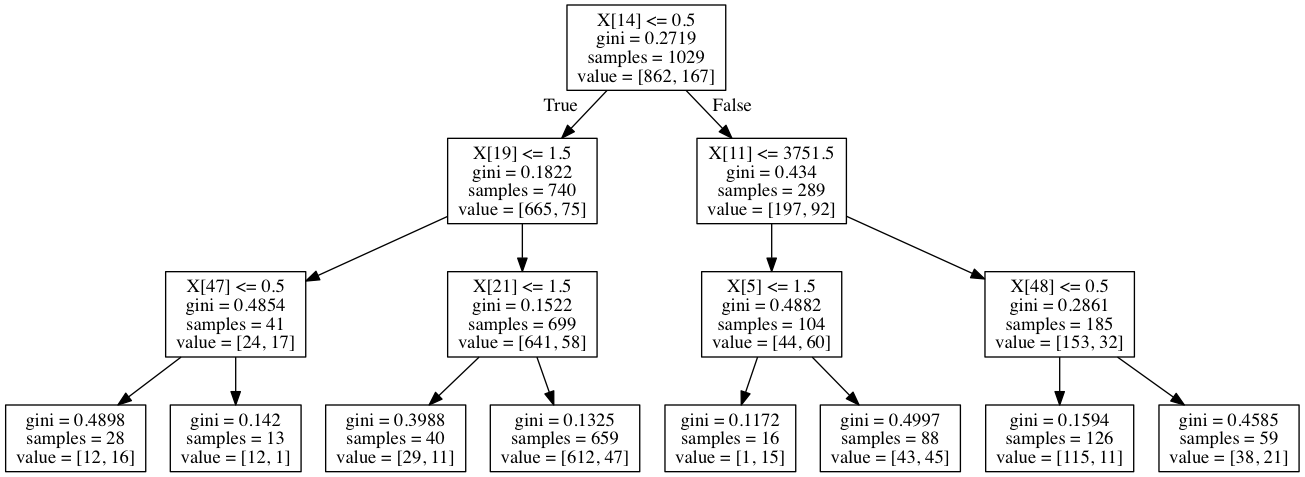

In [188]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 200, 
                                  max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_gini, out_file = None)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())


## How to predict promotion, or cases of descrimination-- look into it

restrict trees in trying more features, then there will be more opporunities to try to learn what features are importance


try random forrest classification model 


In [189]:
from sklearn.metrics import accuracy_score

print metrics.accuracy_score(y_test, clf_gini.predict(X_test))

print metrics.classification_report(y_test, clf_gini.predict(X_test))

0.823129251701
             precision    recall  f1-score   support

          0       0.88      0.92      0.90       371
          1       0.43      0.33      0.37        70

avg / total       0.81      0.82      0.81       441



In [190]:
important_features = pd.DataFrame({'feature':feature_names, 'importance':clf_gini.feature_importances_})

important_features = important_features.sort_values(by="importance", ascending=False)
print important_features

                      feature  importance
11              MonthlyIncome    0.319485
14                   OverTime    0.287788
19          TotalWorkingYears    0.125285
48            Sales Executive    0.085281
5     EnvironmentSatisfaction    0.072303
47         Research Scientist    0.063848
21            WorkLifeBalance    0.046010
0                         Age    0.000000
37         ed_TechnicalDegree    0.000000
30     Research & Development    0.000000
31                      Sales    0.000000
32          ed_HumanResources    0.000000
33             ed_LifeScience    0.000000
34               ed_Marketing    0.000000
35                 ed_Medical    0.000000
36                   ed_Other    0.000000
39                    Married    0.000000
38                   Divorced    0.000000
28              Travel_Rarely    0.000000
40                     Single    0.000000
41  Healthcare Representative    0.000000
42            Human Resources    0.000000
43      Laboratory Technician    0

In [191]:
X.shape

(1470, 50)

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=50, n_informative=2, n_redundant=0, 
                          random_state=0, shuffle=False)
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=.4, random_state=42)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(X_train,y_train)
important_features_forest = pd.DataFrame({'feature':feature_names, 'importance':clf_forest.feature_importances_})
important_features_forest = important_features_forest.sort_values(by="importance", ascending=False)

print "Important Features \n", important_features_forest
print"Predition:", (clf_forest.predict(X_test_forest))


Important Features 
                      feature  importance
14                   OverTime    0.311626
19          TotalWorkingYears    0.185719
11              MonthlyIncome    0.107908
18           StockOptionLevel    0.091741
9                    JobLevel    0.060118
49       Sales Representative    0.044882
12                MonthlyRate    0.029300
8              JobInvolvement    0.028779
25       YearsWithCurrManager    0.024539
28              Travel_Rarely    0.022380
38                   Divorced    0.020550
1                   DailyRate    0.018489
23         YearsInCurrentRole    0.017504
22             YearsAtCompany    0.013617
0                         Age    0.011696
20      TrainingTimesLastYear    0.007358
4              EmployeeNumber    0.003793
44                    Manager    0.000000
43      Laboratory Technician    0.000000
42            Human Resources    0.000000
41  Healthcare Representative    0.000000
33             ed_LifeScience    0.000000
40            

In [193]:
X_perf, y_perf = df_expanded.drop("PerformanceRating", axis = 1), df_expanded["PerformanceRating"]
feature_names = X_perf.columns.tolist()

In [194]:
X_perf_train, X_perf_test, y_perf_train, y_perf_test = train_test_split(X_perf, y_perf, test_size = .4, random_state = 20)

In [195]:
decision_tree= DecisionTreeRegressor(max_depth =3)
decision_tree.fit(X_perf_train, y_perf_train)

print "RSME:", np.sqrt(mean_squared_error(y_perf_test, decision_tree.predict(X_perf_test)))

RSME: 0.0


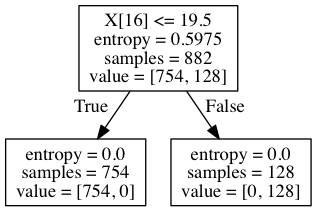

In [196]:
clf_gini = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, 
                                  max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_perf_train, y_perf_train)
dot_data = tree.export_graphviz(clf_gini, out_file = None)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())